# What is the Dataset?

About this Dataset: Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Disney+ , along with details such as - cast, directors, ratings, release year, duration, etc.

The dataset is available on Kaggle for free

# Import Libraries

In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.express as px
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

# Load dataset

In [3]:
df = pd.read_csv(r"C:\Users\pc\Downloads\disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [5]:
df.shape

(1450, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


Dataset has 1450 rows and 12 columns having null values in director,cast,country,date_added,and rating column

release_year is showing int data type . remaining all are having object data type.

# Check Duplicate values

In [7]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [8]:
df.duplicated().sum()  

0

No duplicate values

# Check and Handle Null Values

In [9]:
df.isnull().sum() 

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<AxesSubplot:>

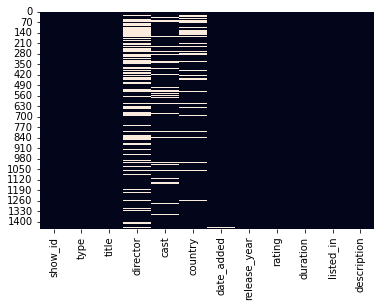

In [10]:
sns.heatmap(df.isnull(), cbar=False)

Max null values are present in director column. And then cast , country. 

date_added and rating columns have only 3 null values .

# Fill null values
1. Country

In [11]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",United States,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [12]:
df.isnull().sum() 

show_id           0
type              0
title             0
director        473
cast            190
country           0
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<AxesSubplot:>

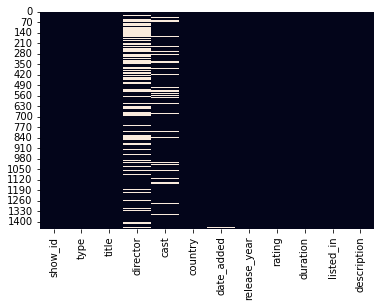

In [13]:
sns.heatmap(df.isnull(), cbar=False)

In [14]:
#drop column not needed in analysis 

df= df.drop(['director','cast','date_added'], axis=1)


df

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,United States,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,United States,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [51]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          3
duration        0
listed_in       0
description     0
dtype: int64

<AxesSubplot:>

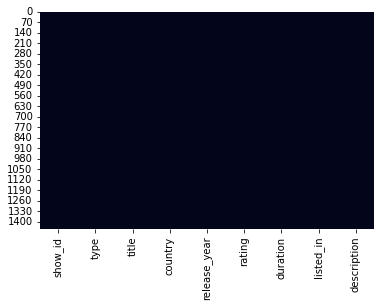

In [52]:
sns.heatmap(df.isnull(), cbar=False)

In [55]:
df.dropna(how='any',inplace=True)

In [56]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

No Null Values and no Duplicate Values.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1447 non-null   object
 1   type          1447 non-null   object
 2   title         1447 non-null   object
 3   country       1447 non-null   object
 4   release_year  1447 non-null   int64 
 5   rating        1447 non-null   object
 6   duration      1447 non-null   object
 7   listed_in     1447 non-null   object
 8   description   1447 non-null   object
dtypes: int64(1), object(8)
memory usage: 113.0+ KB


# Exploratory Data Analysis

# Problem Statement

We are going to analyse the What type of content is available? What is the quality of that content ?
What is  the time duration of that content? What genre available and most watched by audiance.

# Which type of Contents available on Disney+  ? and what is the ratio?

<AxesSubplot:ylabel='type'>

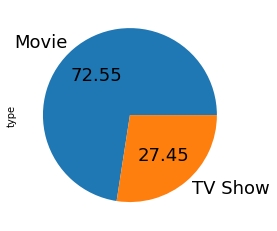

In [15]:
df.type.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

In [16]:
df["type"].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

---->  72.63 % movies and 27.37% TV shows are available on Disney+.

---->  1052 movies and 398 TV shows that means More movies are available on Disney+ till date.

# Release Year

# In which year highest number of movies and TV shows were released?

<AxesSubplot:xlabel='release_year', ylabel='Count'>

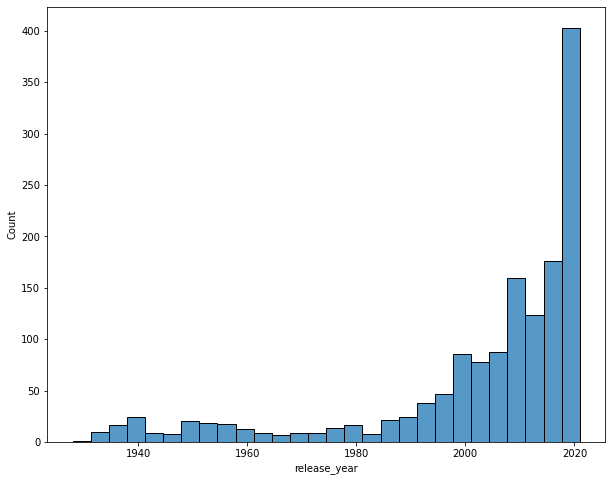

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(x=df["release_year"])


In [18]:
df["release_year"].value_counts().head(10)

2021    125
2020    114
2019     99
2017     69
2018     65
2016     61
2011     52
2014     50
2015     46
2012     41
Name: release_year, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

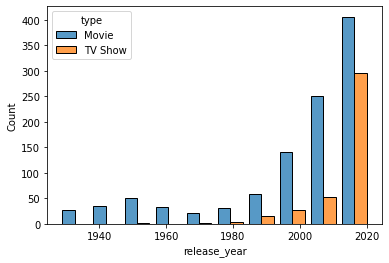

In [19]:
sns.histplot(data=df, x="release_year",bins=10,hue='type',multiple="dodge", shrink=.8)

----> In year 2020 maximum no. of movies and Tv shows were released.

----> Around 400 movies and 250 Tv shows were released.

In [20]:
df[(df['type']=='Movie') & (df['release_year']==2010)]

,show_id,type,title,country,release_year,rating,duration,listed_in,description
39,s40,Movie,Tick Tock Tale,United States,2010,G,6 min,"Animation, Crime, Family",A tale of a quirky mantle clock.
45,s46,Movie,Prep & Landing: Operation Secret Santa,United States,2010,TV-G,8 min,"Animation, Family, Fantasy",Mrs. Claus enlists two elves in a secret mission.
49,s50,Movie,The Search for Santa Paws,Canada,2010,G,101 min,"Drama, Family, Fantasy",Discover how the legendary friendship of Santa...
303,s304,Movie,You Again,United States,2010,PG,106 min,Comedy,An unlikely reunion causes high school drama t...
378,s379,Movie,The Sorcerer's Apprentice,United States,2010,PG,111 min,"Action-Adventure, Fantasy",A modern-day sorcerer must make his seemingly ...
393,s394,Movie,The Chronicles Of Narnia: The Voyage of the Da...,"United States, United Kingdom",2010,PG,113 min,"Action-Adventure, Family, Fantasy",Three heroes sail with King Caspian to help Na...
398,s399,Movie,Disneynature Oceans,"France, Switzerland, Spain, United States, Uni...",2010,G,84 min,"Animals & Nature, Documentary, Family",Journey into the depths of a wonderland filled...
441,s442,Movie,Prince of Persia: The Sands of Time,United States,2010,PG-13,117 min,"Action-Adventure, Fantasy",A rogue prince and rival princess safeguard a ...
495,s496,Movie,Big Sur: Wild California,United States,2010,TV-PG,47 min,"Animals & Nature, Documentary, Family",Why is California's Big Sur coastline experien...
512,s513,Movie,Percy Jackson & The Olympians: The Lightning T...,"United Kingdom, Canada, United States",2010,PG,119 min,"Action-Adventure, Family, Fantasy",A boy discovers he's the descendant of Poseido...


# Country analysis

# Show the titles that are released in specific country

In [21]:
df[df['country'].str.contains('India')]['country'].count()

5

In [22]:
df['country'].unique()

array(['United States', 'United States, Canada',
       'United States, Australia', 'Canada',
       'United States, United Kingdom', 'United States, South Korea',
       'Ireland, United States, Canada, United Kingdom, Denmark, Spain, Poland, Hungary',
       'France, United Kingdom', 'United Kingdom, Australia',
       'Ireland, United States', 'Canada, United States, France',
       'France, South Korea, Japan, United States', 'France',
       'United States, United Kingdom, Hungary', 'United States, Germany',
       'United States, United Kingdom, Australia', 'United States, India',
       'United States, Canada, United Kingdom, Singapore, Australia, Thailand',
       'Canada, United States',
       'South Korea, United States, China, Japan',
       'Australia, United Kingdom', 'United Kingdom',
       'United States, United Kingdom, South Korea',
       'United States, United Kingdom, Canada',
       'United States, Germany, United Kingdom',
       'United States, Canada, Ireland'

In [23]:
df[df['country'].str.contains('United States')]['country'].count()

1403

In [24]:
df[df['country'].str.contains('United Kingdom')]['country'].count()

101

In [25]:
df[df['country'].str.contains('Germany')]['country'].count()

9

# Rating

# What are the different ratings defined by Disney+  ?

In [26]:
df['rating'].unique()

array(['TV-G', 'PG', 'TV-PG', nan, 'PG-13', 'TV-14', 'G', 'TV-Y7', 'TV-Y',
       'TV-Y7-FV'], dtype=object)

3 types of ratings are given to movies. and rest of the ratings are by Tv shows.

In [27]:
df['rating'].nunique()

9

In the words of the Motion Picture Association, 

TV-G     - TV-G definition: a television program rating advising parents that a program is suitable 
           for all ages
           ( General Audiance)

PG       - parental guidance: a rating assigned to a movie by the Motion Picture Association of America 
           indicating that children of all ages may attend 
           but that some material may be deemed unsuitable and that parental guidance is advised
            
TV-PG    - Parental Guidance Suggested.  Many parents may want to watch it with their younger children

PG-13    - Parents Strongly Cautioned, Some Material May Be Inappropriate for Children Under 13. This rating is a stronger caution 
           for parents that content included may not be appropriate for children under 13
    
TV-14    - Parents Strongly Cautioned
           This program contains some material that many parents would find unsuitable 
           for children under
        
G        - General Audiences — all ages admitted

TV-Y7    - Directed to Older Children
           This program is designed for children age 7 andabove. It may be more appropriate 
           for children who have acquired the developmental skills needed to distinguish
           between make-believe and reality.
            
TV-Y     - All Children
           This program is designed to be appropriate for all children
    
TV-Y7-FV - Directed to Older Children –
           Fantasy Violence
           For those programs where fantasy violence may be more
           intense or more combative than other programs in this
           category, such programs will be designated TV-Y7-FV

# Overall ratings on Disney+ 

In [28]:
df["rating"].value_counts()

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

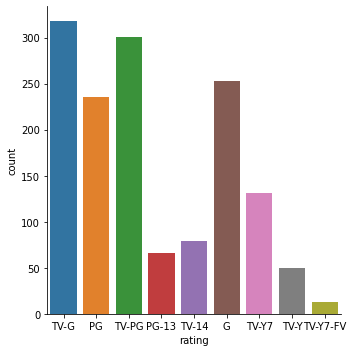

In [29]:
sns.catplot(x ='rating', kind = 'count',  data = df )    # hue = 'type'

Till 2021, Maximum movies and TV shows got TV-G rating - 318 ratings. 
that means most of the movies and TV shows on Disney+ platform are open for all ages.
They can be seen anyone.

It is followed by TV-PG  rating, then G rating and PG rating.

Minimum ratings got by TV-Y7-FV.


<AxesSubplot:xlabel='rating', ylabel='Count'>

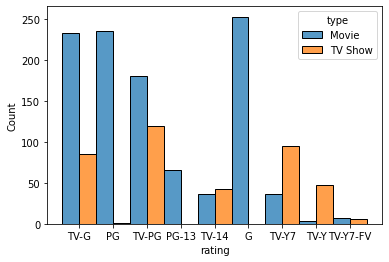

In [30]:
sns.histplot(data=df, x="rating", hue="type", multiple="dodge")

The conclusion is that most of the movies and TV shows are safe to watch for all ages. and some shows need parental guidance.

The content that has most fanatcy violence is very less on Disney+.


# How many movies got TV-14 rating in United States?


In [31]:
df[(df['rating']== 'TV-14')& (df['country'].str.contains('United States'))]

,show_id,type,title,country,release_year,rating,duration,listed_in,description
6,s7,TV Show,Hawkeye,United States,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,United States,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
25,s26,Movie,Limitless with Chris Hemsworth,United States,2021,TV-14,2 min,Lifestyle,"""Limitless with Chris Hemsworth"" is coming to ..."
53,s54,TV Show,Storm Rising,United States,2021,TV-14,1 Season,"Action-Adventure, Animals & Nature, Docuseries",Storm chasers Reed Timmer and Mike Theiss trac...
64,s65,TV Show,Secrets Of The Zoo: Down Under,United States,2020,TV-14,2 Seasons,"Animals & Nature, Docuseries, Family",This series is a behind-the-scenes look at one...
...,...,...,...,...,...,...,...,...,...
1054,s1055,TV Show,Marvel's Agent Carter,United States,2014,TV-14,2 Seasons,"Action-Adventure, Science Fiction, Spy/Espionage","Working for SSR, Peggy would rather be in the ..."
1061,s1062,TV Show,Marvel's Inhumans,United States,2017,TV-14,1 Season,"Action-Adventure, Science Fiction, Superhero",The never-before-told adventure of the Royal F...
1084,s1085,Movie,Miracle at Midnight,United States,1998,TV-14,89 min,"Drama, Historical",A family risks their lives to help their neigh...
1114,s1115,TV Show,Origins: The Journey of Humankind,United States,2016,TV-14,1 Season,"Docuseries, Historical","Hosted by Jason Silva, this eight-part series ..."


So, total 76 movies and Tv shows got TV-14 rating

Likewise, we can also check spacific rating in specific country in specific year.

# Duration Analysis

In [32]:
df.head(2)

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [33]:
df_tvshow= df[df['duration'].str.contains('Season')]
df_tvshow
 

,show_id,type,title,country,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,United States,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,United States,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,United States,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,United States,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",United States,2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...
1417,s1418,TV Show,X-Men: Evolution,United States,2000,TV-Y7,4 Seasons,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
1434,s1435,TV Show,Smart Guy,United States,1996,TV-G,3 Seasons,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
1439,s1440,TV Show,Disney Kirby Buckets,United States,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,Canada,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [34]:
df_movie=df[df['duration'].str.contains('min')]
df_movie

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,United States,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,United States,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,"United States, United Kingdom",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,"United States, Canada",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,"United Kingdom, Germany, United States",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,"United Kingdom, Germany, United States",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


# Which TV show has maximum seasons?

In [35]:
df_tvshow.sort_values(by='duration',ascending=False).head(1)

,show_id,type,title,country,release_year,rating,duration,listed_in,description
553,s554,TV Show,America's Funniest Home Videos,United States,1989,TV-PG,9 Seasons,"Comedy, Family, Fantasy",Home videos compete for cash prizes. Program i...


The TV show "America's Funniest Home Videos" has max no. of seasons, that is 9.

# Which movies has highest time duration?

In [36]:
df_movie.head(2)

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [37]:
df_movie[['duration','min']]= df_movie['duration'].str.split(' ', expand=True)

In [38]:
df_movie.head(2)

,show_id,type,title,country,release_year,rating,duration,listed_in,description,min
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,min
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,min


In [39]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1449
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1052 non-null   object
 1   type          1052 non-null   object
 2   title         1052 non-null   object
 3   country       1052 non-null   object
 4   release_year  1052 non-null   int64 
 5   rating        1051 non-null   object
 6   duration      1052 non-null   object
 7   listed_in     1052 non-null   object
 8   description   1052 non-null   object
 9   min           1052 non-null   object
dtypes: int64(1), object(9)
memory usage: 90.4+ KB


Duration column has object data type. but we want int datatype. So covert it into int datatype.

In [40]:
df_movie['duration']= df_movie['duration'].astype('int64')

In [41]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1449
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1052 non-null   object
 1   type          1052 non-null   object
 2   title         1052 non-null   object
 3   country       1052 non-null   object
 4   release_year  1052 non-null   int64 
 5   rating        1051 non-null   object
 6   duration      1052 non-null   int64 
 7   listed_in     1052 non-null   object
 8   description   1052 non-null   object
 9   min           1052 non-null   object
dtypes: int64(2), object(8)
memory usage: 90.4+ KB


In [42]:
df_movie['duration'].max()

183

Highest time duration is 183 min.

In [43]:
df_movie.sort_values(by='duration',ascending=False).head(1)

,show_id,type,title,country,release_year,rating,duration,listed_in,description,min
1039,s1040,Movie,Marvel Studios' Avengers: Endgame,United States,2019,PG-13,183,"Action-Adventure, Fantasy, Science Fiction","The epic finale to the Infinity Saga, this dra...",min


"Marvel Studios' Avengers: Endgame" this movie has 183 min time duration

In [44]:
df_movie['duration'].mean()

71.9106463878327

Mean time duration is 72 min.

# Which country has max no. of movies?

In [45]:
df_movie['country'].value_counts().head(1)

United States    883
Name: country, dtype: int64

United States has max no. of movies

# Genre Analysis

In [46]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,United States,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,United States,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,United States,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,United States,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [47]:
df['listed_in'].value_counts()

Animation, Comedy, Family                        124
Action-Adventure, Animation, Comedy               77
Action-Adventure, Animation, Kids                 45
Action-Adventure, Animation, Family               40
Animals & Nature, Documentary, Family             40
                                                ... 
Animals & Nature, Family, Reality                  1
Dance, Music, Musical                              1
Comedy, Family, Lifestyle                          1
Buddy, Docuseries                                  1
Action-Adventure, Animals & Nature, Animation      1
Name: listed_in, Length: 329, dtype: int64

# How many animation movies are listed in on Disney+  ?

In [48]:
df[df['listed_in'].str.contains('Animation')]['listed_in'].count()

542

542 animation movies are there listed in.

In [49]:
 df[df['listed_in'].str.contains('Animation')]['listed_in']

0                                   Animation, Family
2                           Animation, Comedy, Family
15                                          Animation
16                          Animation, Comedy, Family
17                                    Animation, Kids
                            ...                      
1433       Action-Adventure, Animation, Coming of Age
1436                       Animation, Family, Mystery
1437              Action-Adventure, Animation, Comedy
1444                        Animation, Comedy, Family
1449    Action-Adventure, Animals & Nature, Animation
Name: listed_in, Length: 542, dtype: object

In [50]:
df[df['listed_in']=='Animation']

,show_id,type,title,country,release_year,rating,duration,listed_in,description
15,s16,Movie,Baymax!,United States,2021,TV-G,1 min,Animation,“Baymax!” premieres on Disney+ summer 2022.
266,s267,Movie,Star Wars Vintage: Story of the Faithful Wookiee,United States,2021,TV-Y7-FV,9 min,Animation,"With his friends ailing from a sleeping virus,..."


# Summary:


    
1. 72.63 %= 1052 movies and 27.37%= 398 TV shows are available on Disney+.

2. In year 2020 maximum no. of movies and Tv shows were released. Around 400 movies and 250 Tv shows were released

3. in United States= 1403 , United Kingdom = 101 and Germany= 9 movies and Tvshows are released.

4. Most of the content on Disney+ platform is safe to watch for all ages.
   It is categorised to G for General audiance and TV-G for general Audiance rating by TV .

5. The TV show "America's Funniest Home Videos" has max no. of seasons, that is 9.
   "Marvel Studios' Avengers: Endgame" this movie has 183 min time duration.
    Mean time duration for movies is 72 min.

6. United States has max no. of movies. 883 movies

7. 542 animation movies are there listed in.



# Future Scope of the Analysis:


1. We can split the countries into  different columns,thereby separate out the all counties and do more specific analysis regarding country.
  like Which is country where highest no. of movies and TV shows are released.

2. Same case for listed_in column that is Genre of movie and cast of the movies and Tvshows.
  We can have detailed analysis on those columns.
